# ZOMATO  RESTAURANTS ANALYSIS

***ZOMATO*** is an Indian food delivering company.It patners with the restaurants all around india and share the restaurants  informations like food_menu,location,price per serve,reviews and rating given by the customers for their users in an online application.There is about 12,000 restaurants in Bangalore.
-------------------------------------------------------------

In this project I'm using the dataset of Zomato based Restaurants in **Bangalore**.
---
We will analyze based on the rate and approx.cost for two people.where rating is a continuous variable.
----

**Here is how we'll apporach buliding the model:**

```

  1. Importing the relevent libraries and Load the data
  2. Data Preprocessing
       - data cleaning
  3. EDA/Data Visualization
     - Handling outliers
      - Handling Categorical Data
        - Visualization For Skewness
  4. Feature Selection
  5. Splitting The Data
  6. Model Selection / Traning the Model
  7. Model Evaluation
  
 
```

### Columns description

- **url** contains the url of the restaurant in the zomato website

- **address** contains the address of the restaurant in Bengaluru

- **name** contains the name of the restaurant

- **online_order** whether online ordering is available in the restaurant or not

- **book_table** table book option available or not

- **rate contains** the overall rating of the restaurant out of 5

- **votes** contains total number of rating for the restaurant as of the above mentioned date

- **phone** contains the phone number of the restaurant

- **location** contains the neighborhood in which the restaurant is located

- **rest_type** restaurant type

- **dish_liked** dishes people liked in the restaurant

- **cuisines** food styles, separated by comma

- **approx_cost(for two people)** contains the approximate cost for meal for two people

- **reviews_list** list of tuples containing reviews for the restaurant.

- **menu_item** contains list of menus available in the restaurant

- **listed_in(type)** type of meal

- **listed_in(city)** contains the neighborhood in which the restaurant is listed

## IMPORT AND LOAD DATA 

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-pastel'])
import seaborn as sns
import plotly.graph_objs as go 
import plotly.express as px

%matplotlib inline

In [154]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [155]:
zomt_orign = pd.read_csv("zomato.csv")
zomt_orign.head(6)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


In [156]:
zomt_orign.shape

(51717, 17)

In [157]:
zomt_orign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [158]:
zomt_orign.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## DATA PREPROCESSING

In [159]:
zomt_orign.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

There is a lot of missing values in the data, first we'll remove the unneccessary columns like url,phone 
 and then we'll drop the rest of the  null values.

In [160]:
df = zomt_orign.drop(['url','phone'],axis=1)

In [161]:
df.dropna(how='any',inplace=True)

In [162]:
df.duplicated().sum()

11

In [163]:
df.drop_duplicates(inplace = True)

In [164]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [165]:
df.shape

(23395, 15)

In [166]:
#df.reset_index(inplace=True)

In [167]:
df = df.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'meal_type'
                          ,'listed_in(city)':'city'})
#df.columns

In [168]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [169]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: float(x.replace(',','')))

In [170]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [171]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [172]:
df = df.loc[df.rate != 'NEW']

In [173]:
df['rate'] = df['rate'].apply(lambda x: float(x.replace('/5','')))
print("------"*10)
df['rate'].unique()

------------------------------------------------------------


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [174]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [175]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

## EDA - EXPLORATORY DATA ANALYSIS


1.Restaurants delivering online or Not
-----

In [176]:
colors = ['#2ca02c', '#d62728']

fig = px.bar(df, x=df['online_order'].value_counts().index, y=df['online_order'].value_counts(),
            color=df['online_order'].value_counts().index, color_discrete_sequence=colors)

fig.update_layout(title='Restaurants delivering online or Not')
fig.show()

2.Table Booking Availability
---

In [177]:
x = df['book_table'].value_counts()

fig = px.pie(values=x.values, names=x.index, color_discrete_sequence=['teal', 'lightblue'])

fig.update_layout(title='Table Booking Availability')

fig.show()


Text(0, 0.5, 'table booking')

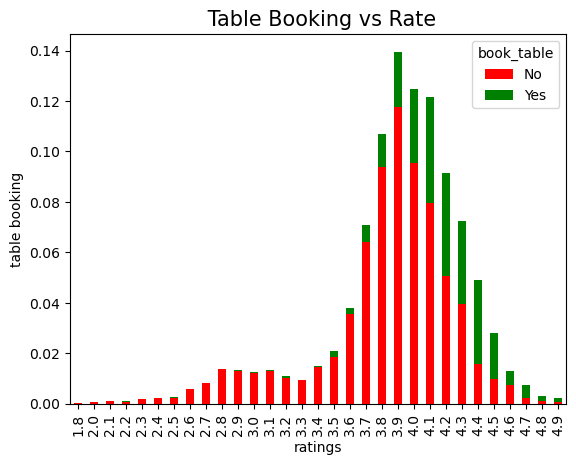

In [178]:
pd.crosstab(df.rate, df.book_table,normalize=True).plot(kind='bar',stacked = True,color = ['red', 'green'])
plt.title(' Table Booking vs Rate',fontsize=15);
plt.xlabel('ratings')
plt.ylabel('table booking')


3.Type of Service available in the resaurants
----

In [179]:
fig = px.pie(df, values=df['meal_type'].value_counts(), names=df['meal_type'].value_counts().index,
             title='Type of Service', labels={'labels': 'Meal Type', 'values': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set1)


fig.update_layout(
    autosize=False,
    width=800,
    height=600)

fig.show()

4.Types of Restaurants 
-----

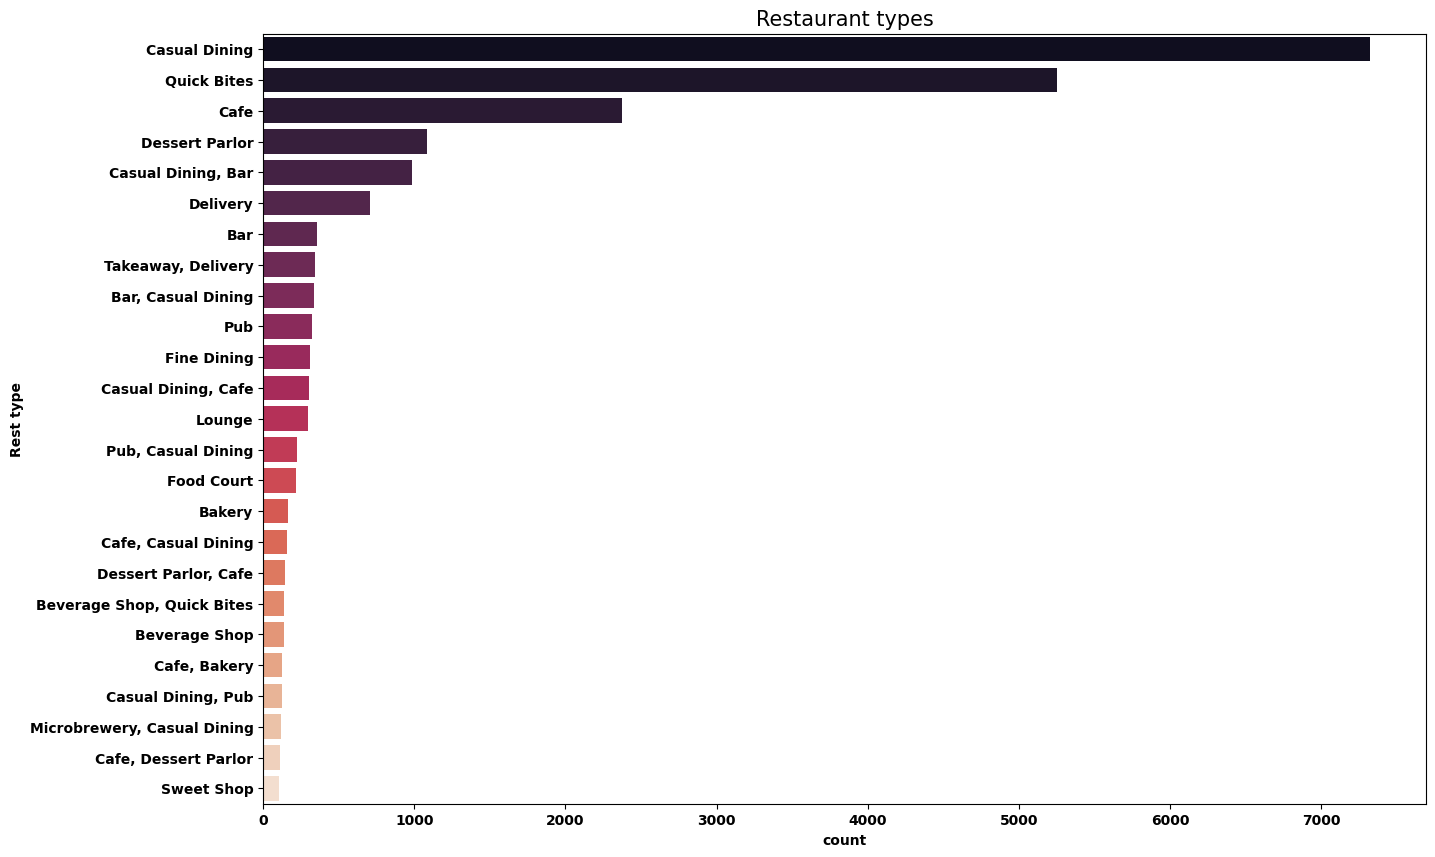

In [180]:
plt.figure(figsize=(15,10))
rest=df['rest_type'].value_counts()[:25]
sns.barplot(x=rest,y = rest.index,palette="rocket")
plt.title("Restaurant types",fontsize=15)
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('count',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.show()

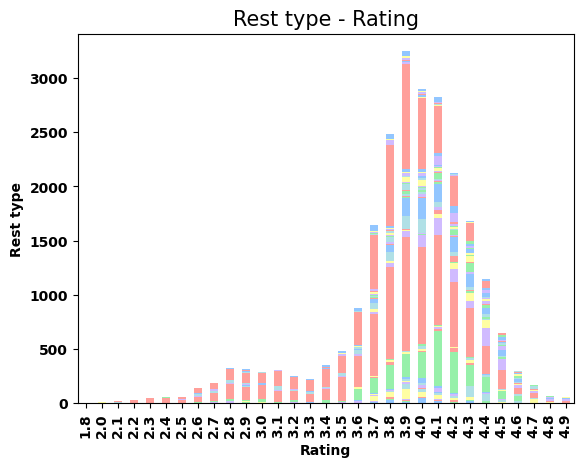

In [181]:
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15)
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

5.No.of.Restaurants in a location
-----

In [182]:
def count_plot(data ,x ,y): 
    plt.figure(figsize=(x,y))
    ax = sns.countplot(x=data, palette= "Spectral" , edgecolor='white', linewidth=1, order=data.value_counts().iloc[0:10].index)
    plt.xticks(rotation=90)    
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge')
    None

Text(0.5, 1.0, 'No.of restaurant in a location')

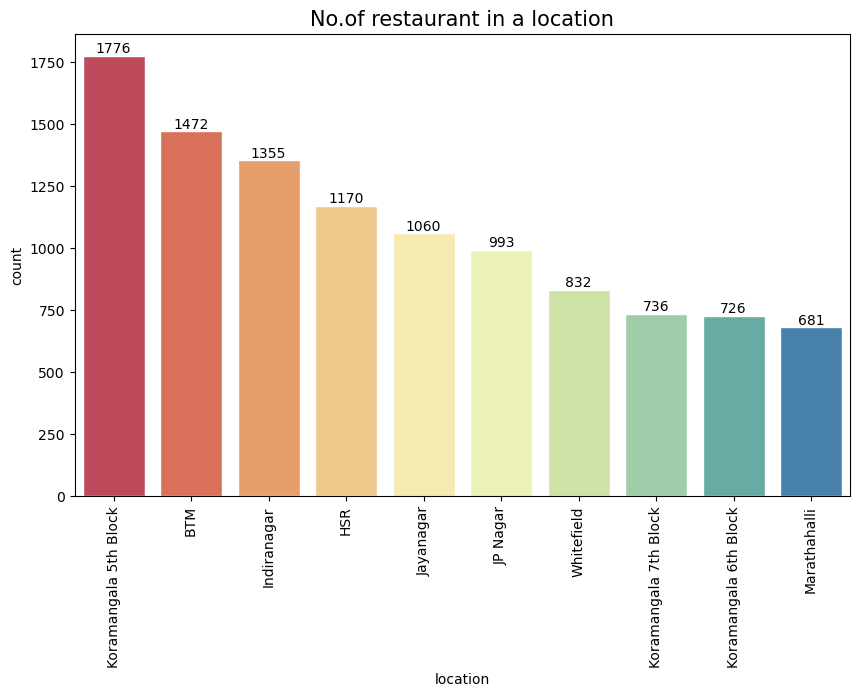

In [183]:
count_plot(df['location'], 10, 6)
plt.title("No.of restaurant in a location",fontsize=15)

### * **Location by Ratings**

<Figure size 1500x1000 with 0 Axes>

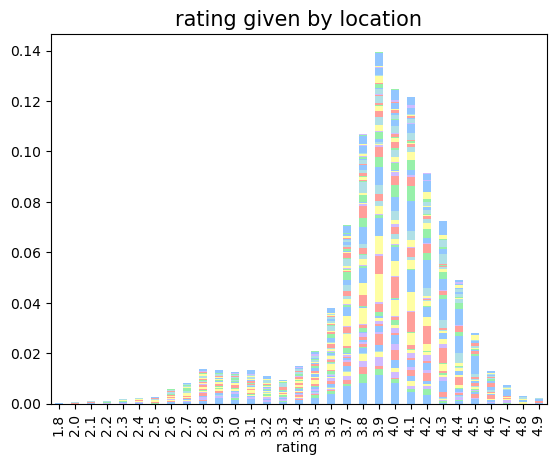

In [184]:
plt.figure(figsize=(15,10))
pd.crosstab(df.rate, df.location,normalize=True).plot(kind='bar',stacked = True)
plt.title('rating given by location',fontsize=15)
plt.xlabel('rating ')
plt.legend().remove()

6.Most no.of Outlets restaurants chains in Bangaluru
------

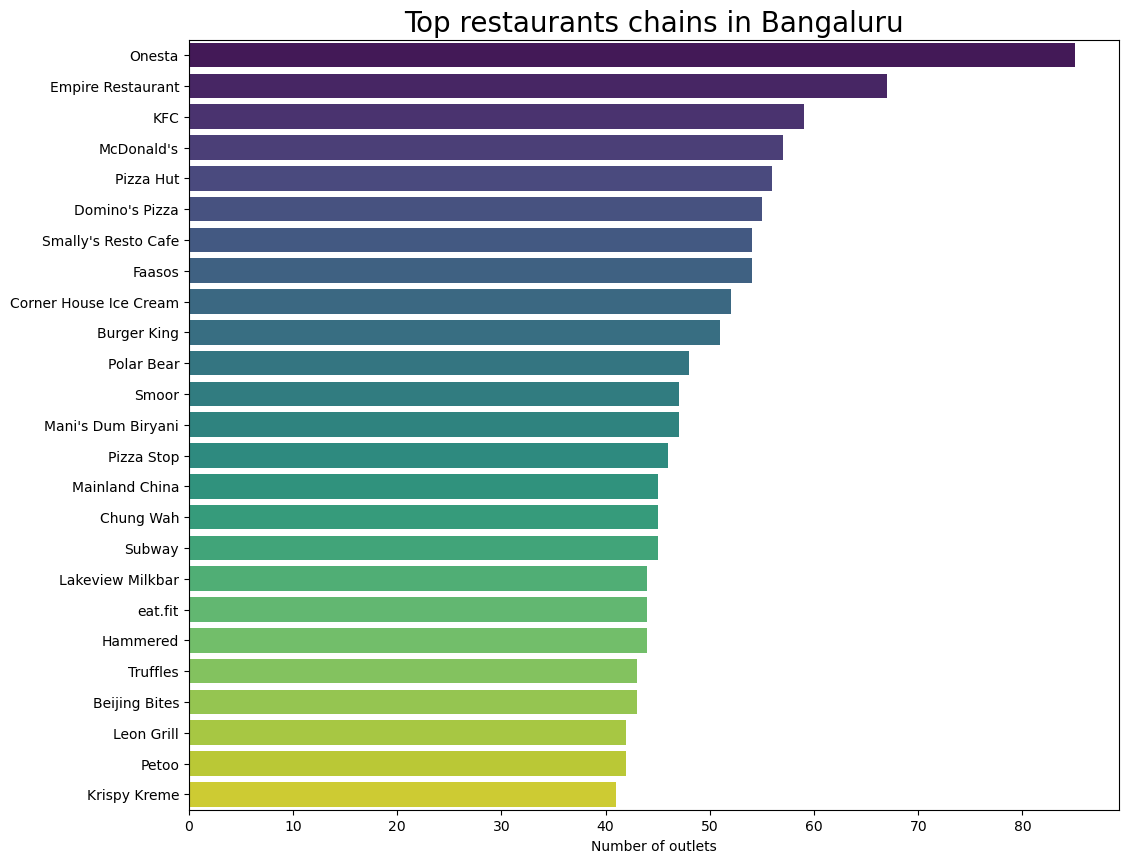

In [185]:
plt.figure(figsize=(12,10))
chains=df['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='viridis')
plt.title("Top restaurants chains in Bangaluru",fontsize=20)
plt.xlabel("Number of outlets")
plt.show()

In [186]:
df.describe()

,rate,votes,cost
count,23248.000000,23248.000000,23248.000000
mean,3.905781,605.461674,753.500946
std,0.426153,1113.706789,520.472169
min,1.800000,0.000000,40.000000
25%,3.800000,104.000000,400.000000
50%,4.000000,225.000000,600.000000
75%,4.200000,597.000000,1000.000000
max,4.900000,16832.000000,6000.000000


### HANDLING OUTLIERS

In [187]:
# removing the outliers only from votes ,which has a lot of outliers
dfv=df['votes']
IQR=(dfv.quantile(0.75)-(dfv.quantile(0.25)))
lower=dfv.quantile(0.25)-(1.5*IQR)
upper=dfv.quantile(0.25)+(1.5*IQR)
df=df[~((dfv<lower)|(dfv>upper))]

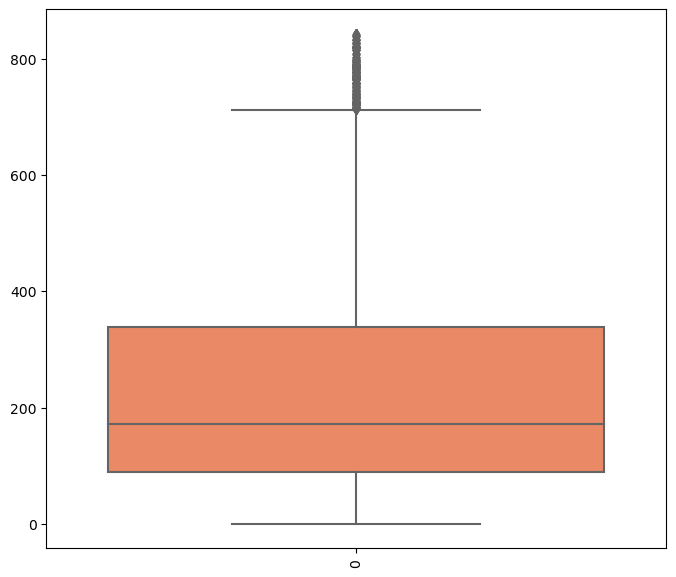

In [188]:
plt.figure(figsize=(8,7))
sns.boxplot(df['votes'],color='coral')
plt.xticks(rotation='vertical')
plt.show()

In [189]:
dfr=df['rate']
IQR=(dfr.quantile(0.75)-(dfr.quantile(0.25)))
lower=dfr.quantile(0.25)-(1.5*IQR)
upper=dfr.quantile(0.25)+(1.5*IQR)
df=df[~((dfr<lower)|(dfr>upper))]

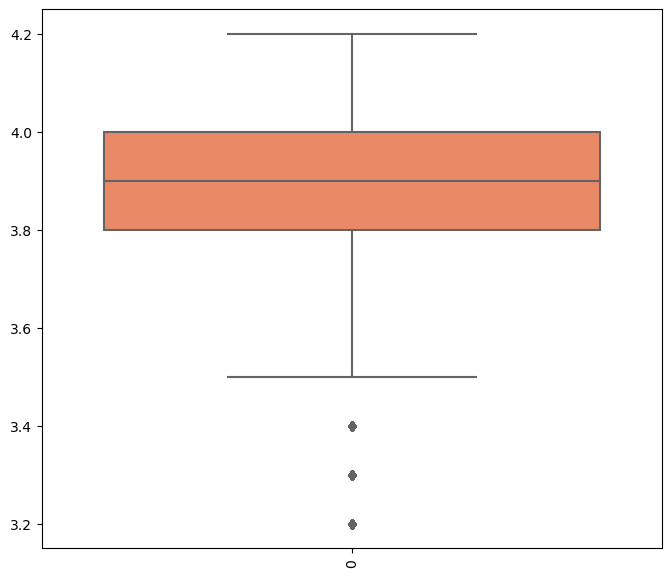

In [190]:
plt.figure(figsize=(8,7))
sns.boxplot(df['rate'],color='coral')
plt.xticks(rotation='vertical')
plt.show()

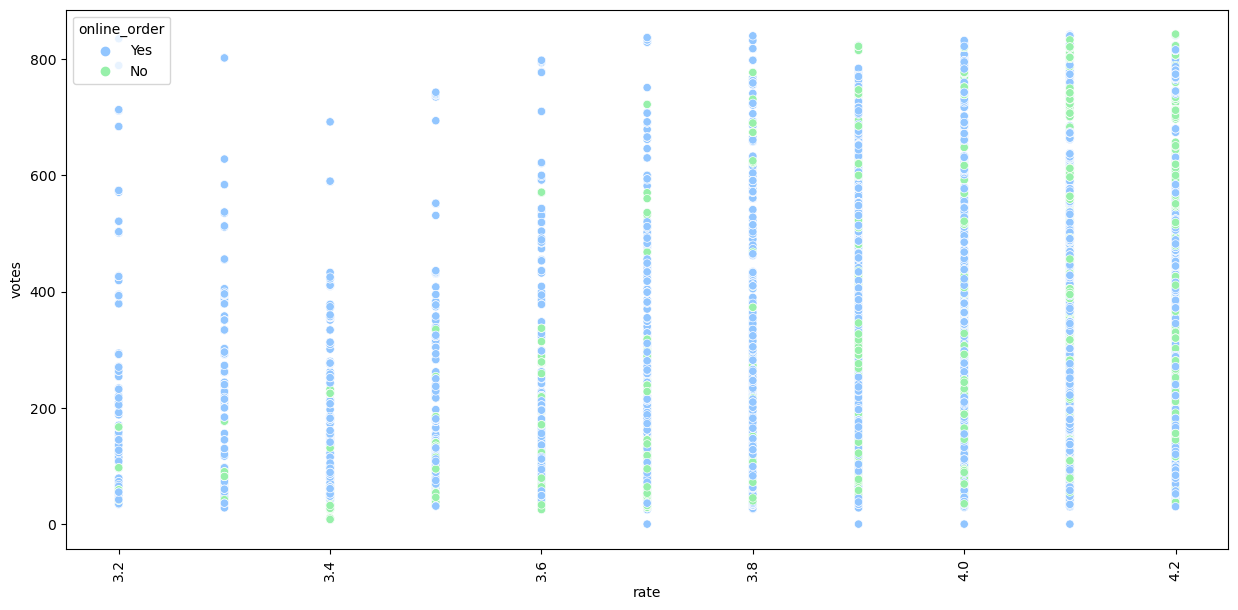

In [191]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="rate",y='votes',hue='online_order',data=df)
plt.xticks(rotation = 90)
plt.show()

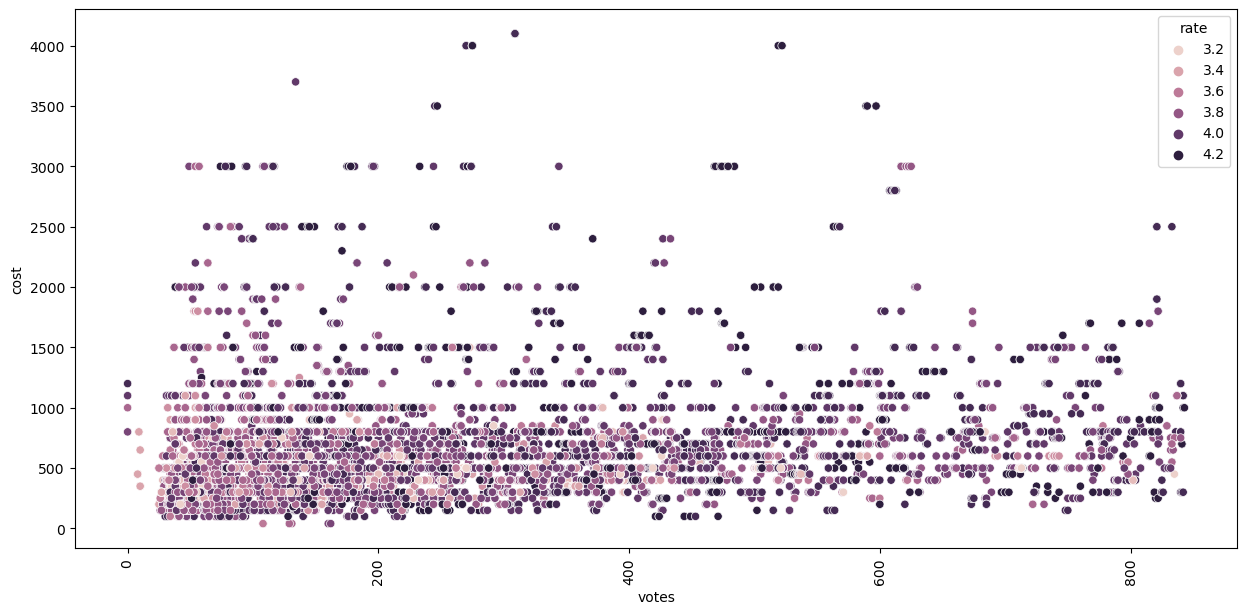

In [192]:
plt.figure(figsize=(15,7))
sns.scatterplot(y="cost",x='votes',hue='rate',data=df)
plt.xticks(rotation = 90)
plt.show()

In [193]:
df[(df["cost"] == 6000)]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,meal_type,city


In [194]:
df[(df["cost"] == 6000)]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,meal_type,city


<Axes: xlabel='rate', ylabel='cost'>

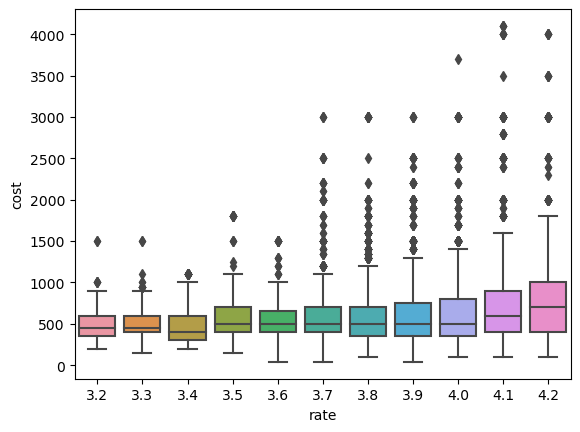

In [195]:
sns.boxplot(x=df.rate,y=df.cost)

### HANDLING CATEGORICAL DATA

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15248 entries, 0 to 51707
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       15248 non-null  object 
 1   name          15248 non-null  object 
 2   online_order  15248 non-null  object 
 3   book_table    15248 non-null  object 
 4   rate          15248 non-null  float64
 5   votes         15248 non-null  int64  
 6   location      15248 non-null  object 
 7   rest_type     15248 non-null  object 
 8   dish_liked    15248 non-null  object 
 9   cuisines      15248 non-null  object 
 10  cost          15248 non-null  float64
 11  reviews_list  15248 non-null  object 
 12  menu_item     15248 non-null  object 
 13  meal_type     15248 non-null  object 
 14  city          15248 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.4+ MB


In [197]:
df_cat=df.loc[:,['online_order','book_table','location','rest_type','cuisines','menu_item']]

In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [200]:
df_cat.head()

,online_order,book_table,location,rest_type,cuisines,menu_item
0,1,1,1,17,1015,3594
1,1,0,1,17,442,3594
3,0,0,1,46,1168,3594
4,0,0,4,17,1028,3594
5,1,0,4,17,842,3594


In [201]:
df_num=df.loc[:,['votes','cost','rate']]

In [202]:
df_num.head()

,votes,cost,rate
0,775,800.0,4.1
1,787,800.0,4.1
3,88,300.0,3.7
4,166,600.0,3.8
5,286,600.0,3.8


### HANDLING THE SKEWNESS

In [203]:
from scipy.stats import skew

votes
1.3109736894357231


<Figure size 400x400 with 0 Axes>

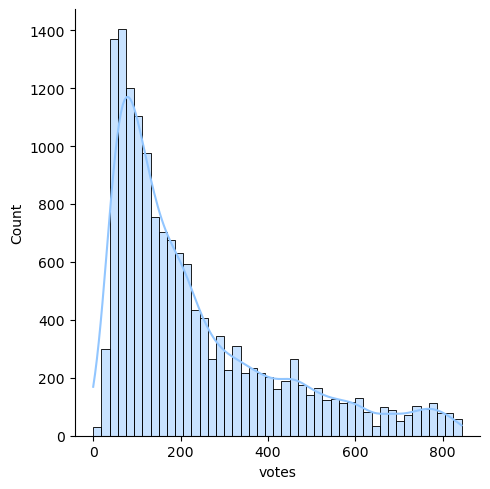

cost
2.5366915486878825


<Figure size 400x400 with 0 Axes>

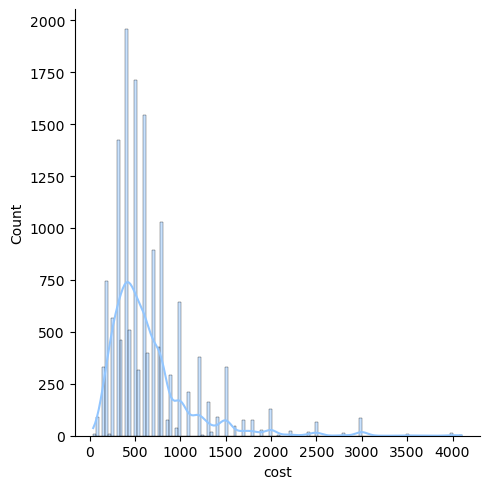

rate
-0.7528061633896647


<Figure size 400x400 with 0 Axes>

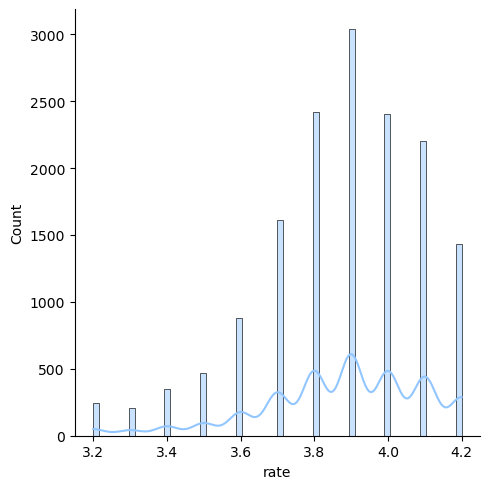

In [204]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure(figsize=(4,4))
    sns.displot(df_num[col],kde=True)
    plt.show()

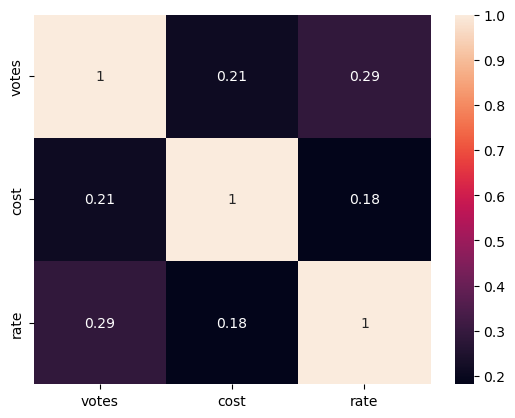

In [205]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [206]:
df['cost']=np.sqrt(df['cost'])

In [207]:
skew(df['cost'])

1.2055675778713242

In [208]:
df['votes']=np.sqrt(df['votes'])

In [209]:
skew(df['votes'])

0.7041161247556008

In [210]:
df_new=pd.concat([df_num,df_cat],axis = 1)

In [211]:
df_new.head()

,votes,cost,rate,online_order,book_table,location,rest_type,cuisines,menu_item
0,775,800.0,4.1,1,1,1,17,1015,3594
1,787,800.0,4.1,1,0,1,17,442,3594
3,88,300.0,3.7,0,0,1,46,1168,3594
4,166,600.0,3.8,0,0,4,17,1028,3594
5,286,600.0,3.8,1,0,4,17,842,3594


### SPLITTING THE DATA

In [227]:
X=df_new.drop(['rate'],axis=1) #contain all  independent variable
y=df_new['rate']           #dependent variable
df_new['rate'].value_counts()

3.9    3036
3.8    2416
4.0    2400
4.1    2199
3.7    1612
4.2    1434
3.6     876
3.5     469
3.4     351
3.2     246
3.3     209
Name: rate, dtype: int64

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### MODEL TRANING

### LINEAR REGRESSION

In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=12)
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [230]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=lr_model.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred)
mae_lr=mean_absolute_error(y_test,y_pred)
r2_lr=r2_score(y_test,y_pred)

### DECISION TREE

In [231]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_predt=dt_model.predict(X_test)
mse_dt=mean_squared_error(y_test,y_predt)
mae_dt=mean_absolute_error(y_test,y_predt)
r2_dt=r2_score(y_test,y_predt)

### RANDOM FOREST

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
rf_model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rf_model.fit(X_train,y_train)
y_predict=rf_model.predict(X_test)
mse_rf=mean_squared_error(y_test,y_predict)
mae_rf=mean_absolute_error(y_test,y_predict)
r2_rf=r2_score(y_test,y_predict)


### XGBOOST

In [234]:
# Install
!pip install xgboost
# Import
import xgboost as xgb
from xgboost import XGBRegressor

In [235]:
xgb_r = XGBRegressor(n_estimators = 100, seed = 123) 
xgb_r.fit(X_train, y_train) 
pred = xgb_r.predict(X_test) 
mse_xg=mean_squared_error(y_test,pred)
mae_xg=mean_absolute_error(y_test,pred)
r2_xg=r2_score(y_test,pred)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid ={
    'C':[1,10,20],
    'kernel':['linear','rbf','poly']
 }

svr =SVR()
grid_search = GridSearchCV(estimator =svr,param_grid = param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best Parameters: ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)

### MODEL EVALUATION

In [236]:
print("r2 Score of LINEAR REGRESSION : ",r2_lr)
print("r2 Score of DECISION TREE : ",r2_dt)
print("r2 score of RANDOM FOREST : ",r2_rf)
print("r2 Score of XGBOOST : ",r2_xg)
print("------"*12)
print("mean squared error of LINEAR REGRESSION : ",mse_lr)
print("mean squared error of DECISION TREE : ",mse_dt)
print("mean squared error of RANDOM FOREST : ",mse_rf)
print("mean squared error of XGBOOST : ",mse_xg)
print("------"*12)
print("mean absolute error of LINEAR REGRESSION : ",mae_lr)
print("mean absolute error of DECISION TREE : ",mae_dt)
print("mean absolute error of RANDOM FOREST : ",mae_rf)
print("mean absolute error of XGBOOST : ",mae_xg)


r2 Score of LINEAR REGRESSION :  0.13013003189501438
r2 Score of DECISION TREE :  0.76451466813404
r2 score of RANDOM FOREST :  0.8363043025067864
r2 Score of XGBOOST :  0.7544027389366456
------------------------------------------------------------------------
mean squared error of LINEAR REGRESSION :  0.04156810973937528
mean squared error of DECISION TREE :  0.011253038357378977
mean squared error of RANDOM FOREST :  0.007822457340474865
mean squared error of XGBOOST :  0.011736252858357537
------------------------------------------------------------------------
mean absolute error of LINEAR REGRESSION :  0.1596750747010809
mean absolute error of DECISION TREE :  0.03163467776910418
mean absolute error of RANDOM FOREST :  0.04679274928535238
mean absolute error of XGBOOST :  0.07328536400508358
